<a href="https://colab.research.google.com/github/JensBlack/tutorials/blob/main/intro_analysing_pose_estimation_multidlc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
#import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [131]:
def load_file(filename, report = True):
    f = pd.read_csv(filename, header = [0,1,2,3], index_col = 0)

    clm_names = np.array(f.columns)
    scorer = np.unique(f.columns.get_level_values(0))
    animals = np.unique(f.columns.get_level_values(1))
    bodyparts = np.unique(f.columns.get_level_values(2))
    coords = np.unique(f.columns.get_level_values(3))

    if report:
      print("Filename: ", filename)
      print('DATA INFO: \n')
      print("Scorer: ", scorer)
      print(f"Animals: ", ', '.join(animals))
      print(f"Bodyparts/keypoints: ", ", ".join(bodyparts))
      print(f"Coordinates/Likelihood: ", ", ".join(coords))
      print("Length: ", f.shape[0], " frames")
      print()
    return f, scorer, animals, bodyparts

In [132]:
path = "/220422_126_127_TrimDLC_dlcrnetms5_openfieldMay31shuffle1_200000_el.csv"

df, scorer, animals, bodyparts = load_file(path)

Filename:  /220422_126_127_TrimDLC_dlcrnetms5_openfieldMay31shuffle1_200000_el.csv
DATA INFO: 

Scorer:  ['DLC_dlcrnetms5_openfieldMay31shuffle1_200000']
Animals:  mouse1, mouse2
Bodyparts/keypoints:  neck, nose, tailbase
Coordinates/Likelihood:  likelihood, x, y
Length:  3697  frames



Let's look at the data (in pandas called DataFrame or "df"):

You will see that it is a table-based format that has rows with measurements - x, y coordinates and a likelihood value for each frame/index - and columns with different types of body parts (e.g. nose, neck, tailbase) and animals (e.g. mouse1).

In [133]:
df

scorer      DLC_dlcrnetms5_openfieldMay31shuffle1_200000                      \
individuals                                       mouse1                       
bodyparts                                           nose                       
coords                                                 x        y likelihood   
0                                                341.482  136.958        1.0   
1                                                342.168  138.246        1.0   
2                                                342.600  138.598        1.0   
3                                                343.187  138.926        1.0   
4                                                343.186  138.925        1.0   
...                                                  ...      ...        ...   
3692                                             475.710  412.380        1.0   
3693                                             476.570  419.137        1.0   
3694                                             476.565  419.131        1.0   
3695                                             479.047  425.612        1.0   
3696                                             478.213  425.498        1.0   

scorer                                                                 \
individuals                                                             
bodyparts       neck                     tailbase                       
coords             x        y likelihood        x        y likelihood   
0            348.100  138.419        1.0  380.054  133.016        1.0   
1            348.289  138.739        1.0  380.409  133.014        1.0   
2            347.948  139.258        1.0  380.283  132.984        1.0   
3            348.102  139.862        1.0  380.703  132.988        1.0   
4            348.100  139.860        1.0  380.703  132.986        1.0   
...              ...      ...        ...      ...      ...        ...   
3692         475.240  400.270        1.0  480.316  367.453        1.0   
3693         473.184  405.110        1.0  479.219  368.419        1.0   
3694         473.199  405.098        1.0  479.199  368.390        1.0   
3695         472.544  413.268        1.0  476.301  371.215        1.0   
3696         473.793  413.381        1.0  474.366  379.515        1.0   

scorer                                                                 \
individuals   mouse2                                                    
bodyparts       nose                         neck                       
coords             x        y likelihood        x        y likelihood   
0            440.595  156.491        1.0  432.417  158.417        1.0   
1            440.586  156.443        1.0  432.327  158.421        1.0   
2            440.432  156.327        1.0  432.119  158.179        1.0   
3            440.422  156.313        1.0  432.222  158.113        1.0   
4            440.421  156.309        1.0  432.223  158.110        1.0   
...              ...      ...        ...      ...      ...        ...   
3692         343.988  138.807        1.0  329.352  131.104        1.0   
3693         347.372  135.368        1.0  334.354  133.327        1.0   
3694         347.368  135.365        1.0  334.359  133.322        1.0   
3695         347.163  135.901        1.0  333.897  136.298        1.0   
3696         349.334  138.854        1.0  335.446  137.318        1.0   

scorer                                    
individuals                               
bodyparts   tailbase                      
coords             x        y likelihood  
0            409.107  173.847        1.0  
1            409.183  173.764        1.0  
2            409.145  173.670        1.0  
3            408.966  173.595        1.0  
4            408.965  173.592        1.0  
...              ...      ...        ...  
3692         297.275  132.079        1.0  
3693         299.107  131.694        1.0  
3694         299.107  131.689        1.0  
3695         300.019  131.634        1.0  
3696 

Taking this format into account, we can use the data to analyze the animals position across time in a frame-wise manner (discrete timesteps) as any other type of timeseries data.

Picked mouse1, nose.


/usr/local/lib/python3.7/dist-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


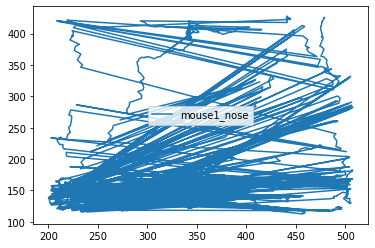

In [134]:
#pick a bodypart and animal

animal = animals[0]
bp = bodyparts[1]
print(f"Picked {animal}, {bp}.")

x_coords, y_coords, likelihood = df[(scorer[0], animal,bp)].values.T

plt.plot(x_coords, y_coords, label = "_".join([animal, bp]))
plt.legend()




You might pick up on some jitters/jumps in the pose estimation here. This is due to the fact that we are looking at unprocessed (raw) data and sometimes the algorithm is not good at estimating the position.

In [135]:
#let's find out how many values are below a minimum likelihood

#for this we can use the likelihood column for each bodypart

likelihood_clm = df[(scorer[0], animal, bp, "likelihood")]

print("INFO: ")
print(f"Range: {likelihood_clm.min()} to {likelihood_clm.max()} with avg {likelihood_clm.mean()} +/- {likelihood_clm.std()}")

threshold = 0.6
print(f"How many frames have a likelihood under {threshold}?")
flt_likelihood_clm = likelihood_clm.values > threshold
print(f"Values above threshold: {flt_likelihood_clm.sum()} of {flt_likelihood_clm.shape[0]}")

INFO: 
Range: 1.0 to 1.0 with avg 1.0 +/- 0.0
How many frames have a likelihood under 0.6?
Values above threshold: 3694 of 3697


We can get rid of these values by removing them and interpolate them. the simplest way of doing this is a linear interpolation (luckily that's already build into pandas).

In [136]:
#first set all values below the threshold to NaN (not a number)
# for simplicity we are doing this in one go for all animals and bodyparts (consistency is key in data science)

#IMPORTANT! Before we do anything with the data, we copy it, so that we keep an original version
df_flt = df.copy(deep = True)
#now, we only work on the copy!
for animal in animals:
  for bodypart in bodyparts: 
    threshold_mask = df[(scorer[0], animal, bodypart, "likelihood")].values < threshold
    print(f"Found {threshold_mask.sum()} values for {animal}, {bodypart}.")
    df_flt[(scorer[0], animal, bodypart, "x")][threshold_mask] = np.NaN
    df_flt[(scorer[0], animal, bodypart, "y")][threshold_mask] = np.NaN

print("Quick overview of the found and replaced values: \n", df_flt.isna().sum())    



Found 0 values for mouse1, neck.
Found 0 values for mouse1, nose.
Found 0 values for mouse1, tailbase.
Found 0 values for mouse2, neck.
Found 2 values for mouse2, nose.
Found 0 values for mouse2, tailbase.
Quick overview of the found and replaced values: 
 scorer                                        individuals  bodyparts  coords    
DLC_dlcrnetms5_openfieldMay31shuffle1_200000  mouse1       nose       x               3
                                                                      y               3
                                                                      likelihood      3
                                                           neck       x               3
                                                                      y               3
                                                                      likelihood      3
                                                           tailbase   x               3
                                              

If both doesn't match, it is very likely that your data was missing some frames already (which is usually the result of a filtering step). So make sure that you are using raw data. if this is on purpose, the next step will clean up those values anyway.

In [137]:
help(df_flt.interpolate)

Help on method interpolate in module pandas.core.frame:

interpolate(method: 'str' = 'linear', axis: 'Axis' = 0, limit: 'int | None' = None, inplace: 'bool' = False, limit_direction: 'str | None' = None, limit_area: 'str | None' = None, downcast: 'str | None' = None, **kwargs) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Fill NaN values using an interpolation method.
    
    Please note that only ``method='linear'`` is supported for
    DataFrame/Series with a MultiIndex.
    
    Parameters
    ----------
    method : str, default 'linear'
        Interpolation technique to use. One of:
    
        * 'linear': Ignore the index and treat the values as equally
          spaced. This is the only method supported on MultiIndexes.
        * 'time': Works on daily and higher resolution data to interpolate
          given length of interval.
        * 'index', 'values': use the actual numerical values of the index.
        * 'pad': Fill in NaNs using existing va

In [138]:
#interpolate the dataframe with this command
df_flt.interpolate(inplace = True)
print("How many NaNs are left? \n")
df_flt.isna().sum()

How many NaNs are left? 



scorer                                        individuals  bodyparts  coords    
DLC_dlcrnetms5_openfieldMay31shuffle1_200000  mouse1       nose       x             0
                                                                      y             0
                                                                      likelihood    0
                                                           neck       x             0
                                                                      y             0
                                                                      likelihood    0
                                                           tailbase   x             0
                                                                      y             0
                                                                      likelihood    0
                                              mouse2       nose       x             0
                                                           

Let's plot it again and see what happened

Picked mouse1, nose.


/usr/local/lib/python3.7/dist-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


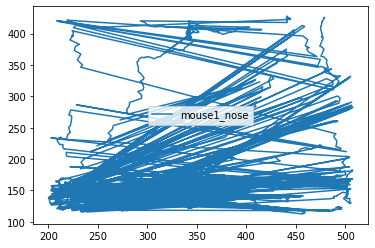

In [139]:
#pick a bodypart and animal

animal = animals[0]
bp = bodyparts[1]
print(f"Picked {animal}, {bp}.")

x_coords, y_coords, likelihood = df_flt[(scorer[0], animal,bp)].values.T

plt.plot(x_coords, y_coords, label = "_".join([animal, bp]))
plt.legend()

Now let's begin with some basic analysis:

If we want to know how far the animal moved across the whole session, we need to calculate the distance it traveled each frame measure by a chosen bodypart and the sum it up.

the distance between each frame is the euclidean distance betwenn timepoint 0 and t + 1

In [140]:
def calc_dist(x1,y1,x2,y2):
  #calculates euclidean distance between two points
  out_array = (np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2))
  return out_array


def calc_distance_between_frames(df):
  # shift coordinates by 1 so that we calculate the distance traveled between the current and the last frame (easier than itering through all rows, believe me)
  # last value gets NaN
  df_shift = df.shift(periods=1)
  # rename each column to "x/y_shifted"
  df_shift.rename(lambda x: x + '_shifted',axis='columns',level=3,inplace=True)

  scorer = df.columns.get_level_values(0).unique()[0]
  animals = list(df.columns.get_level_values(1).unique())
  bodyparts = list(df.columns.get_level_values(2).unique())

  for animal in animals:
    for bp in bodyparts:
      x1 = df[(scorer,animal,bp,'x')]
      x2 = df_shift[(scorer,animal,bp,'x_shifted')]
      y1 = df[(scorer,animal,bp,'y')]
      y2 = df_shift[(scorer,animal,bp,'y_shifted')]
      dist_series = calc_dist(x1,y1,x2,y2)
      dist_series.name = (scorer, animal,bp,'dist')
      df = pd.concat([df,dist_series],axis=1)
  # resorting will change the original order, so only do this at the end if you really have to
  # df = df.reindex(columns=sorted(df.columns))
  return df



In [141]:
df_calc = df_flt.copy(deep = True)

df_calc = calc_distance_between_frames(df_calc)
# this will add a distance column in the same format to the original data.
#if we want to only look at the distance columns, we can drop all others:
df_dist = df_calc.drop(columns = ["x", "y", "likelihood"], level = 3)

In [142]:
print(f"Distance traveled in px across the whole session:")
df_dist.sum()

Distance traveled in px across the whole session:


scorer                                        individuals  bodyparts  coords
DLC_dlcrnetms5_openfieldMay31shuffle1_200000  mouse1       nose       dist      72941.854743
                                                           neck       dist      71356.316552
                                                           tailbase   dist      68135.885188
                                              mouse2       nose       dist      72282.412972
                                                           neck       dist      70621.085172
                                                           tailbase   dist      66370.350508
dtype: float64

If we know the length of an object in the video in px and in cm, we can easily convert this into cm.

If we know the fps of the video recording, we can also get some information about the time/speed etc.

In [143]:
obj_length_px = 10 #add your value
obj_length_cm = 1 #add your value
px_to_cm = obj_length_px/obj_length_cm

df_dist_cm = df_dist / px_to_cm 

print(f"Total distance travelled per bodypart (cm): \n {df_dist_cm.sum()}")

Total distance travelled per bodypart (cm): 
 scorer                                        individuals  bodyparts  coords
DLC_dlcrnetms5_openfieldMay31shuffle1_200000  mouse1       nose       dist      7294.185474
                                                           neck       dist      7135.631655
                                                           tailbase   dist      6813.588519
                                              mouse2       nose       dist      7228.241297
                                                           neck       dist      7062.108517
                                                           tailbase   dist      6637.035051
dtype: float64


In [144]:
fps = 30 # add your value

print(f"Average speed (cm/s) per bodypart: \n {df_dist_cm.mean()/fps}")

Average speed (cm/s) per bodypart: 
 scorer                                        individuals  bodyparts  coords
DLC_dlcrnetms5_openfieldMay31shuffle1_200000  mouse1       nose       dist      0.065785
                                                           neck       dist      0.064355
                                                           tailbase   dist      0.061450
                                              mouse2       nose       dist      0.065190
                                                           neck       dist      0.063691
                                                           tailbase   dist      0.059858
dtype: float64


You can also plot this, to see changes across time:

Picked mouse1, nose.


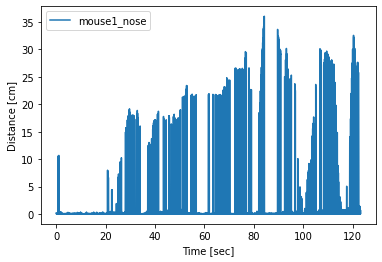

In [145]:
animal = animals[0]
bp = bodyparts[1]
print(f"Picked {animal}, {bp}.")

y = df_dist_cm[(scorer[0], animal,bp, "dist")].values
x = np.arange(y_coords.shape[0])/fps

plt.plot(x, y, label = "_".join([animal, bp]))
plt.ylabel("Distance [cm]")
plt.xlabel("Time [sec]")
plt.legend()

Now, if you are interested to see whether your animal is interacting with an object or other thing of interest, we can use the same functions to calculate the animals distance to it. Assuming that proximity or distance to a point indicates the animals behavioral reaction to it.

In [146]:
#take the calculate distance function from above and add in an object point instead of the next frame

def calc_distance_from_point(df, point: tuple):
  
  scorer = df.columns.get_level_values(0).unique()[0]
  animals = list(df.columns.get_level_values(1).unique())
  bodyparts = list(df.columns.get_level_values(2).unique())

  for animal in animals:
    for bp in bodyparts:
      x1 = df[(scorer,animal,bp,'x')]
      x2 = point[0]
      y1 = df[(scorer,animal,bp,'y')]
      y2 = point[1]
      dist_series = calc_dist(x1,y1,x2,y2)
      dist_series.name = (scorer, animal,bp,'point_dist')
      df = pd.concat([df,dist_series],axis=1)

  return df

In [151]:
obj_point = (0,0)
df_obj = df_flt.copy(deep = True)
df_obj = calc_distance_from_point(df_obj, point = obj_point)

# this will add a distance column in the same format to the original data.
#if we want to only look at the distance columns, we can drop all others:
df_obj = df_obj.drop(columns = ["x", "y", "likelihood"], level = 3)
df_obj

scorer      DLC_dlcrnetms5_openfieldMay31shuffle1_200000              \
individuals                                       mouse1               
bodyparts                                           nose        neck   
coords                                        point_dist  point_dist   
0                                             367.923158  374.611038   
1                                             369.040508  374.904971   
2                                             369.572950  374.780738   
3                                             370.240125  375.148479   
4                                             370.238823  375.145878   
...                                                  ...         ...   
3692                                          629.569113  621.344615   
3693                                          634.661161  622.910274   
3694                                          634.653444  622.913865   
3695                                          640.805433  627.764503   
3696                                          640.106414  628.779499   

scorer                                                       
individuals                  mouse2                          
bodyparts      tailbase        nose        neck    tailbase  
coords       point_dist  point_dist  point_dist  point_dist  
0            402.659036  467.561105  460.521886  444.512448  
1            402.993463  467.536561  460.438756  444.549947  
2            402.864623  467.352627  460.160218  444.478233  
3            403.262424  467.338520  460.234264  444.284158  
4            403.261764  467.336239  460.234173  444.282065  
...                 ...         ...         ...         ...  
3692         604.752153  370.938172  354.486951  325.295693  
3693         604.469527  372.816043  359.956506  326.815402  
3694         604.435996  372.811227  359.959298  326.813387  
3695         603.873512  372.815276  360.644356  327.626175  
3696         607.498755  375.918444  362.464139  332.422762  

[3697 rows x 6 columns]

I can use this to define a threshold (proximity) to that point as indicator that the animal is behaving in a certain way (e.g. explores the object). Similiar to the likelihood threshold i can use the following function:

In [160]:
prox_threshold = 400 #this is still in px but you can also convert everything into centimeter (see above conversion)

#this assumes a circular region of interest
df_threshold = df_obj < prox_threshold

#the result is a boolean mask for each frame
df_threshold

scorer      DLC_dlcrnetms5_openfieldMay31shuffle1_200000             \
individuals                                       mouse1              
bodyparts                                           nose       neck   
coords                                        point_dist point_dist   
0                                                   True       True   
1                                                   True       True   
2                                                   True       True   
3                                                   True       True   
4                                                   True       True   
...                                                  ...        ...   
3692                                               False      False   
3693                                               False      False   
3694                                               False      False   
3695                                               False      False   
3696                                               False      False   

scorer                                                   
individuals                mouse2                        
bodyparts     tailbase       nose       neck   tailbase  
coords      point_dist point_dist point_dist point_dist  
0                False      False      False      False  
1                False      False      False      False  
2                False      False      False      False  
3                False      False      False      False  
4                False      False      False      False  
...                ...        ...        ...        ...  
3692             False       True       True       True  
3693             False       True       True       True  
3694             False       True       True       True  
3695             False       True       True       True  
3696             False       True       True       True  

[3697 rows x 6 columns]

In [161]:
print(f"Total time spent close to point (total session: {df_threshold.shape[0]/fps:.2f} sec): \n", df_threshold.sum()/fps)

Total time spent close to point (total session: 123.23 sec): 
 scorer                                        individuals  bodyparts  coords    
DLC_dlcrnetms5_openfieldMay31shuffle1_200000  mouse1       nose       point_dist    75.666667
                                                           neck       point_dist    73.533333
                                                           tailbase   point_dist    50.800000
                                              mouse2       nose       point_dist    47.166667
                                                           neck       point_dist    45.200000
                                                           tailbase   point_dist    44.333333
dtype: float64


You can also plot the events across time:

Picked mouse1, nose.


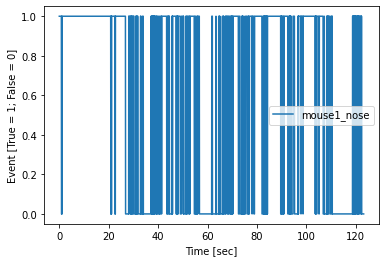

In [164]:
animal = animals[0]
bp = bodyparts[1]
print(f"Picked {animal}, {bp}.")

y = df_threshold[(scorer[0], animal,bp, "point_dist")].values
x = np.arange(y_coords.shape[0])/fps

plt.plot(x, y, label = "_".join([animal, bp]))
plt.ylabel("Event [True = 1; False = 0]")
plt.xlabel("Time [sec]")
plt.legend()